# 1) Algebra 

we can find the value of y by having its features. 


In [1]:
# Import the requirments
import numpy as np
import matplotlib.pyplot as plt


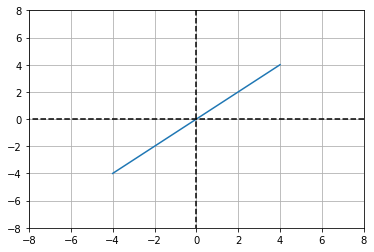

In [3]:
# f(x)==> y=x

x=[-4,-3,-2,-1,0,1,2,3,4]
y=x
plt.plot(x , y)
plt.plot([8,-8] , [0,0] , 'k--')
plt.plot([0,0] , [8,-8] , 'k--')
plt.grid()
plt.axis((-8, 8, -8, 8))
plt.show()


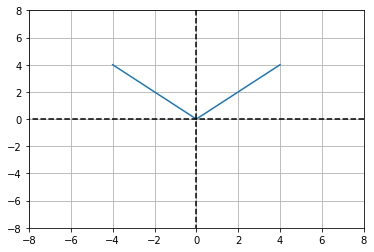

In [5]:
# f(x)==> y=abs(x)
X=[-4,-3,-2,-1,0,1,2,3,4]
y=[abs(x) for x in X ]
plt.plot(X, y)
plt.plot([8,-8] , [0,0] , 'k--')
plt.plot([0,0] , [8,-8] , 'k--')
plt.grid()
plt.axis((-8, 8, -8, 8))
plt.show()


# 2) Solving a real problem using linear algebra

In [7]:
# we need one more library , Pandas to creat a dataframe from a csv file 
import pandas as pd

In [62]:
df=pd.read_excel("./data/Condos_data_V0.xlsx")
df

,square feet,parking,locker,bed rooms,Target
0,500,0,0,1,45030000
1,500,0,0,2,45060000
2,500,1,0,1,45120000
3,500,2,0,1,45210000
4,300,0,0,0,27000000
5,500,0,1,1,45090000
6,500,1,1,1,45180000
7,400,0,1,0,36060000
8,300,0,1,1,27090000
9,1000,0,1,3,90150000


In [100]:
FX=((df["square feet"])*650)+(90000*(df["parking"]))+(60000*(df["locker"]))+(30000*(df["bed rooms"]))
print(FX)


0     355000
1     385000
2     445000
3     535000
4     195000
5     415000
6     505000
7     320000
8     285000
9     800000
10    770000
11    667500
12    727500
dtype: int64


###  what if we don't have such a function? 

well, that's why we are using machine learning techniques for our prediction. ML will find such a function as a pattern.¶
We need one more library for machine learning: Sklearn. you will use this one a lot during this course. 

In [64]:
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
# define a linear regression model as regr
regr = linear_model.LinearRegression()
# Bum! the model just created , lets train the model



In [67]:
# model training ( model.fit(x,y))
regr.fit(df[["square feet","parking","locker","bed rooms"]], df["Target"])

LinearRegression()

In [68]:
# predict the price : 
regr.predict(df[["square feet","parking","locker","bed rooms"]])

array([45029999.99999999, 45059999.99999999, 45119999.99999999,
       45209999.99999999, 26999999.99999997, 45089999.99999999,
       45180000.        , 36059999.99999999, 27089999.99999997,
       90150000.00000004, 90120000.00000004, 67680000.        ,
       67740000.00000001])

looks great,  

let see how well can predict the new record

In [69]:
new_apartment=[900,1,1,4]

# linear fuction that we already have : 
FX=(900*90000)+(90000*1)+(60000*1)+(30000*4)
print(FX)

81270000


In [70]:
# using ml to predict the price 
# we are using our same trained modle to predict the price:
regr.predict([new_apartment])


array([81270000.00000003])

### So close! means we are in the right path ! 
lets try som more valuse 


In [71]:
new_df=pd.DataFrame(columns=df.columns.tolist(),
                   data=[[1200,1,1,5,np.nan],[400,1,2,1,np.nan],[999,1,1,4,np.nan],[355,0,0,1,np.nan]])

In [72]:
new_df

,square feet,parking,locker,bed rooms,Target
0,1200,1,1,5,NaN
1,400,1,2,1,NaN
2,999,1,1,4,NaN
3,355,0,0,1,NaN


In [73]:
new_df["Target"]=((new_df["square feet"])*90000)+(90000*(new_df["parking"]))+(60000*(new_df["locker"]))+(30000*(new_df["bed rooms"]))
print(new_df)

   square feet  parking  locker  bed rooms     Target
0         1200        1       1          5  108300000
1          400        1       2          1   36240000
2          999        1       1          4   90180000
3          355        0       0          1   31980000


In [74]:
#pridict using regr modle:
new_df["predicted"]=regr.predict(new_df[["square feet","parking","locker","bed rooms"]])
new_df

,square feet,parking,locker,bed rooms,Target,predicted
0,1200,1,1,5,108300000,108300000.0
1,400,1,2,1,36240000,36240000.0
2,999,1,1,4,90180000,90180000.0
3,355,0,0,1,31980000,31980000.0


#### Excellent, we have got the expected results, We are in the right path 

# 3) Classification using Machine learning algorithms:

Lets see if we can predict whether or not the condo has parking spot. 

In [75]:
#define the classifier 
clf = linear_model.LogisticRegression()
"""
training the model, here we are going to predict the number of locker so,
Loker would be our target and the rest of the features would be used for prediction
"""


# Training the modle 
clf.fit(df[["square feet","parking","bed rooms","Target"]], df["locker"])


LogisticRegression()

In [76]:
#pridiction : 

df["predicted_loker"]=clf.predict(df[["square feet","parking","bed rooms","Target"]])
df

,square feet,parking,locker,bed rooms,Target,predicted_loker
0,500,0,0,1,45030000,1
1,500,0,0,2,45060000,1
2,500,1,0,1,45120000,1
3,500,2,0,1,45210000,1
4,300,0,0,0,27000000,1
5,500,0,1,1,45090000,1
6,500,1,1,1,45180000,1
7,400,0,1,0,36060000,1
8,300,0,1,1,27090000,1
9,1000,0,1,3,90150000,1


# 4) Data normalization
well the model couldn't predict anything

let's normalize our dataset to see if we can improve our prediction result

MinMaxscaler is a sklearn function fo


In [96]:
from sklearn.preprocessing import MinMaxScaler

# Define a scaler model using MixMaxscaler fucntion :
scaler = MinMaxScaler()

In [78]:
scaler.fit(df[["square feet","parking","bed rooms","Target"]])

MinMaxScaler()

In [79]:
Normalised_df=pd.DataFrame(columns=["square feet","parking","bed rooms","Target"],
                           data=scaler.transform(df[["square feet","parking","bed rooms","Target"]]))
Normalised_df["locker"]=df["locker"]
Normalised_df

,square feet,parking,bed rooms,Target,locker
0,0.285714,0.0,0.333333,0.285511,0
1,0.285714,0.0,0.666667,0.285986,0
2,0.285714,0.5,0.333333,0.286936,0
3,0.285714,1.0,0.333333,0.288361,0
4,0.000000,0.0,0.000000,0.000000,0
5,0.285714,0.0,0.333333,0.286461,1
6,0.285714,0.5,0.333333,0.287886,1
7,0.142857,0.0,0.000000,0.143468,1
8,0.000000,0.0,0.333333,0.001425,1
9,1.000000,0.0,1.000000,1.000000,1


#### retrain the clf model with the new dataset:

In [80]:
clf.fit(Normalised_df[["square feet","parking","bed rooms","Target"]], Normalised_df["locker"])

LogisticRegression()

In [101]:
Normalised_df["predicted_loker"]=clf.predict(Normalised_df[["square feet","parking","bed rooms","Target"]])
Normalised_df


,square feet,parking,bed rooms,Target,locker,predicted_loker
0,0.285714,0.0,0.333333,0.285511,0,1
1,0.285714,0.0,0.666667,0.285986,0,1
2,0.285714,0.5,0.333333,0.286936,0,0
3,0.285714,1.0,0.333333,0.288361,0,0
4,0.000000,0.0,0.000000,0.000000,0,0
5,0.285714,0.0,0.333333,0.286461,1,1
6,0.285714,0.5,0.333333,0.287886,1,0
7,0.142857,0.0,0.000000,0.143468,1,0
8,0.000000,0.0,0.333333,0.001425,1,1
9,1.000000,0.0,1.000000,1.000000,1,2


In [82]:
# let see the modle accuracy using confusion matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score


In [87]:

# evaluate accuracy
CM=confusion_matrix(Normalised_df["locker"], Normalised_df["predicted_loker"])
print(CM)
report=classification_report(Normalised_df["locker"], Normalised_df["predicted_loker"])
print('Model Performance')
print(report)

[[3 3]
 [2 5]]
Model Performance
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.62      0.71      0.67         7

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13



Not bad, We have got 62% on a very small dataset, 

lets try another dataset to see if Logistic model can help us in the future or not. 


# 5) IRIS dataset  

In [86]:
Iris=pd.read_csv('./data/iris.csv')
Iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,Target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [ ]:
clf = linear_model.LogisticRegression()
clf.fit(Iris[["sepal.length","sepal.width","petal.length","petal.width"]], Iris["Target"])


In [90]:
Iris["predict"]=clf.predict(Iris[["sepal.length","sepal.width","petal.length","petal.width"]])
Iris


,sepal.length,sepal.width,petal.length,petal.width,variety,Target,predict
0,5.1,3.5,1.4,0.2,Setosa,0,1
1,4.9,3.0,1.4,0.2,Setosa,0,1
2,4.7,3.2,1.3,0.2,Setosa,0,1
3,4.6,3.1,1.5,0.2,Setosa,0,1
4,5.0,3.6,1.4,0.2,Setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2,1
146,6.3,2.5,5.0,1.9,Virginica,2,1
147,6.5,3.0,5.2,2.0,Virginica,2,1
148,6.2,3.4,5.4,2.3,Virginica,2,1


In [91]:
CM=confusion_matrix(Iris["Target"], Iris["predict"])
print(CM)
report=classification_report(Iris["Target"], Iris["predict"])
print('Model Performance')
print(report)

[[ 1 49  0]
 [ 0 50  0]
 [ 0 50  0]]
Model Performance
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.34      1.00      0.50        50
           2       0.00      0.00      0.00        50

    accuracy                           0.34       150
   macro avg       0.45      0.34      0.18       150
weighted avg       0.45      0.34      0.18       150



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So disapointing with the raw data, 

Lets try again with a normalized dataset 

In [93]:
#Data Normalization:

scaler.fit(Iris[["sepal.length","sepal.width","petal.length","petal.width"]])



Iris[["sepal.length","sepal.width","petal.length","petal.width"]]=scaler.transform(
    Iris[["sepal.length","sepal.width","petal.length","petal.width"]])

Iris


,sepal.length,sepal.width,petal.length,petal.width,variety,Target,predict
0,0.222222,0.625000,0.067797,0.041667,Setosa,0,1
1,0.166667,0.416667,0.067797,0.041667,Setosa,0,1
2,0.111111,0.500000,0.050847,0.041667,Setosa,0,1
3,0.083333,0.458333,0.084746,0.041667,Setosa,0,1
4,0.194444,0.666667,0.067797,0.041667,Setosa,0,1
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Virginica,2,1
146,0.555556,0.208333,0.677966,0.750000,Virginica,2,1
147,0.611111,0.416667,0.711864,0.791667,Virginica,2,1
148,0.527778,0.583333,0.745763,0.916667,Virginica,2,1


In [94]:
clf = linear_model.LogisticRegression()
clf.fit(Iris[["sepal.length","sepal.width","petal.length","petal.width"]], Iris["Target"])
Iris["predict"]=clf.predict(Iris[["sepal.length","sepal.width","petal.length","petal.width"]])
Iris


,sepal.length,sepal.width,petal.length,petal.width,variety,Target,predict
0,0.222222,0.625000,0.067797,0.041667,Setosa,0,0
1,0.166667,0.416667,0.067797,0.041667,Setosa,0,0
2,0.111111,0.500000,0.050847,0.041667,Setosa,0,0
3,0.083333,0.458333,0.084746,0.041667,Setosa,0,0
4,0.194444,0.666667,0.067797,0.041667,Setosa,0,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Virginica,2,2
146,0.555556,0.208333,0.677966,0.750000,Virginica,2,2
147,0.611111,0.416667,0.711864,0.791667,Virginica,2,2
148,0.527778,0.583333,0.745763,0.916667,Virginica,2,2


In [95]:
CM=confusion_matrix(Iris["Target"], Iris["predict"])
print(CM)
report=classification_report(Iris["Target"], Iris["predict"])
print('Model Performance')
print(report)

[[50  0  0]
 [ 0 45  5]
 [ 0  4 46]]
Model Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.90      0.91        50
           2       0.90      0.92      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



# Double Bum** 

the accuracy of prediction just increased by 60% and reached to 94% ! We are in the right path :) 
